## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy.linalg as LA
import pandas as pd
import sympy
import scipy.stats as st

# Задача 1

Используя ~~Excel~~ Python и данные с сайта [finam.ru](https://www.finam.ru/profile/moex-akcii/sberbank/export/) по ценам акций Сбербанка за Январь 2018 г. с часовым шагом, найти для относительной доходности по часовой торговле выборочные среднюю и дисперсию, построить гистограмму для относительных доходностей по 14 карманам и Q-Q график относительно квантилей соответствующего нормального распределения.

In [2]:
data = pd.read_csv("SBER_jan18.csv", sep=';')

In [3]:
print(data.head())

  <TICKER>  <PER>    <DATE>  <TIME>  <OPEN>  <HIGH>   <LOW>  <CLOSE>    <VOL>
0     SBER     60  20180103  110000  226.88  230.00  226.35   228.52  5031570
1     SBER     60  20180103  120000  228.45  230.58  228.41   229.66  5498620
2     SBER     60  20180103  130000  229.65  230.00  229.00   229.90  2060870
3     SBER     60  20180103  140000  229.90  230.80  229.60   230.38  2317380
4     SBER     60  20180103  150000  230.42  231.87  230.39   231.27  3590380


In [4]:
size = len(data)
relative_yield_spread = np.array([(data['<CLOSE>'][i] - data['<OPEN>'][i]) / data['<CLOSE>'][i] 
                                  for i in range(size)])
m = np.mean(relative_yield_spread)
D = np.var(relative_yield_spread)
sgm = np.std(relative_yield_spread)

In [5]:
print("Выборочная средняя составляет ", m)
print("Выборочная дисперсия равна", D)

Выборочная средняя составляет  0.0008358667923776406
Выборочная дисперсия равна 1.810716039313714e-05


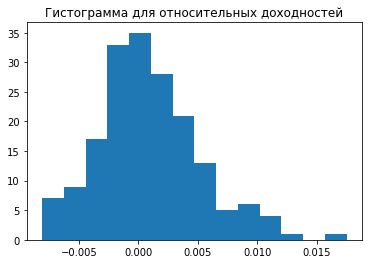

In [6]:
plt.hist(relative_yield_spread, 14)
plt.title(u'Гистограмма для относительных доходностей')
plt.show()

In [23]:
import probscale
position, x = probscale.plot_pos(relative_yield_spread)
quantile = st.norm.ppf(position) #, m, D)

lin = np.poly1d(np.polyfit(quantile, x, 1))

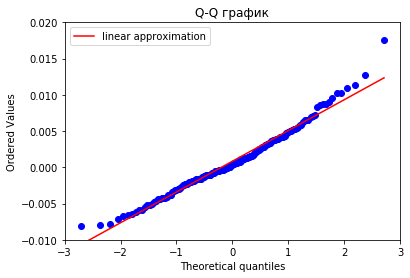

In [26]:
plt.scatter(quantile, x, color='b')
plt.plot(quantile, lin(quantile), color='r', label = 'linear approximation')
plt.title(u"Q-Q график")
plt.ylim(-0.01, 0.02)
plt.legend(loc=2)
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

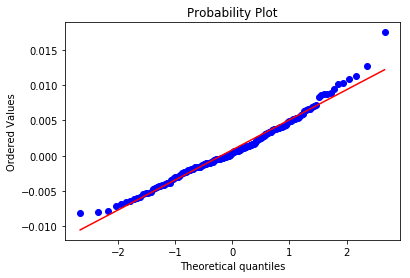

In [27]:
# Сравним:
res = st.probplot(relative_yield_spread, plot=plt)

Идеально!

Тогда поехали дальше:

# Задача 2

Докажите, что совместная плотность $g(y, z)$ порядковых статистик $X_{(1)}$ и $X_{(2)}$